## İklim Değişikliği Hakkında Analiz
* geçmiş yılların verilerini analiz edelim
* **numpy** ile `polyfit`
* **sklearn** ile `LinearRegression`

### Kaynağı Okuyalım

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
years, means=np.loadtxt("https://raw.githubusercontent.com/abdullahkise/kdb100/main/3_Intro_notebook/iklim/5-year-mean-1951-1980.csv",
          delimiter=",",
          unpack=True
          )

#-
years.dtype

years = years.astype(int)

years.dtype

dtype('int64')

### Görselleştirelim

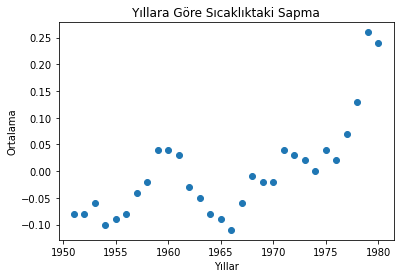

In [19]:
plt.scatter(years, means)

plt.title("Yıllara Göre Sıcaklıktaki Sapma")
plt.xlabel("Yıllar")
plt.ylabel("Ortalama")

plt.show()

#### trend çizgisini çizelim (nump)


In [21]:
#y = mx + b
m,b=np.polyfit(years, means, deg=1)

print(f"y = {m}x + {b}")

y = 0.007279199110122247x + -14.309265850945273


In [22]:
#trend çizgisi üzerindek y'leri veren fnk tanımlayalım
f=lambda x: m*x + b

In [29]:
f(2022) #2022 yılında tahmini sapma

0.40927474972191114

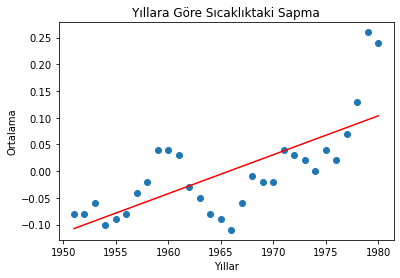

In [28]:
#trend çizgisi
plt.plot(years, f(years), color="Red")
plt.scatter(years, means)

plt.title("Yıllara Göre Sıcaklıktaki Sapma")
plt.xlabel("Yıllar")
plt.ylabel("Ortalama")

plt.show()

### Sklearn ile Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [34]:
years.shape
years.ndim
years[:,np.newaxis].ndim

2

In [40]:
%%time
#
model = LinearRegression()

#
model.fit(years[:,np.newaxis], means) #eğitim başladı ve bitti
#dir(model)

print(f"y = {model.coef_}x + {model.intercept_}")

y = [0.0072792]x + -14.30926585094549
CPU times: user 0 ns, sys: 2.11 ms, total: 2.11 ms
Wall time: 1.59 ms


In [48]:
#tahminleri alalım.
model_predicted = model.predict(years[:,np.newaxis])
model_predicted

array([-0.10754839, -0.10026919, -0.09298999, -0.08571079, -0.07843159,
       -0.07115239, -0.06387319, -0.05659399, -0.04931479, -0.0420356 ,
       -0.0347564 , -0.0274772 , -0.020198  , -0.0129188 , -0.0056396 ,
        0.0016396 ,  0.0089188 ,  0.016198  ,  0.0234772 ,  0.0307564 ,
        0.0380356 ,  0.04531479,  0.05259399,  0.05987319,  0.06715239,
        0.07443159,  0.08171079,  0.08898999,  0.09626919,  0.10354839])

In [47]:
#np.array([ [2022],[2025]]).ndim
model.predict(np.array([ [2022],[2025]]))

array([0.40927475, 0.43111235])

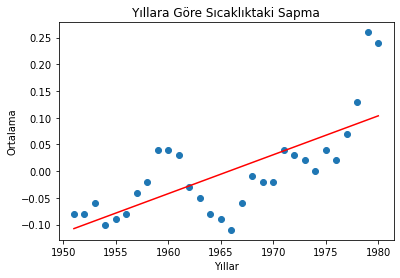

In [49]:
#Lİnear Regression çizgisi
plt.plot(years, model_predicted, color="Red")
plt.scatter(years, means)

plt.title("Yıllara Göre Sıcaklıktaki Sapma")
plt.xlabel("Yıllar")
plt.ylabel("Ortalama")

plt.show()